# Project - Sales Prediction

##  Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading dataset
df = pd.read_csv('advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
print('Number of Rows',df.shape[0])
print('Number of columns',df.shape[1])

Number of Rows 200
Number of columns 4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df[df.duplicated()]

,TV,Radio,Newspaper,Sales


In [8]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

#### 1. There are 200 rows and 4 columns present in our dataset
#### 2. All the features are numerical columns
#### 3. There is no outliers present in our dataset
#### 4. There is no duplicate values and null values in our datasets

## EDA(Exploratory Data Analysis)

### Univariate Analysis

In [9]:
df['TV'].describe().round(3)

count    200.000
mean     147.042
std       85.854
min        0.700
25%       74.375
50%      149.750
75%      218.825
max      296.400
Name: TV, dtype: float64

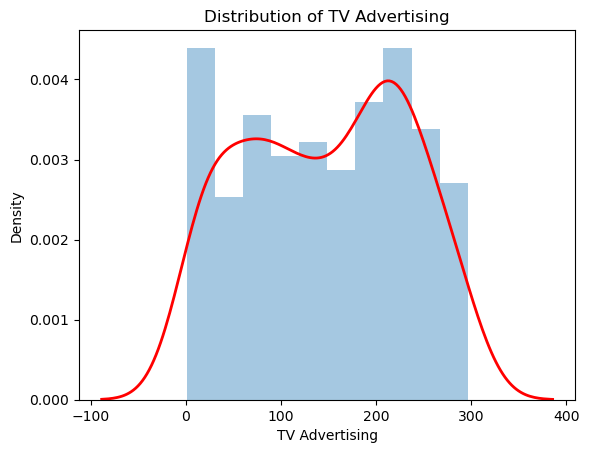

In [10]:
sns.distplot(df['TV'],
             bins=10,
             kde_kws={'color': 'red', 'linewidth': 2})
plt.xlabel('TV Advertising')
plt.ylabel('Density')
plt.title('Distribution of TV Advertising')
plt.show()

TV advertising having uniformly distributed data

In [11]:
df['Radio'].describe().round(3)

count    200.000
mean      23.264
std       14.847
min        0.000
25%        9.975
50%       22.900
75%       36.525
max       49.600
Name: Radio, dtype: float64

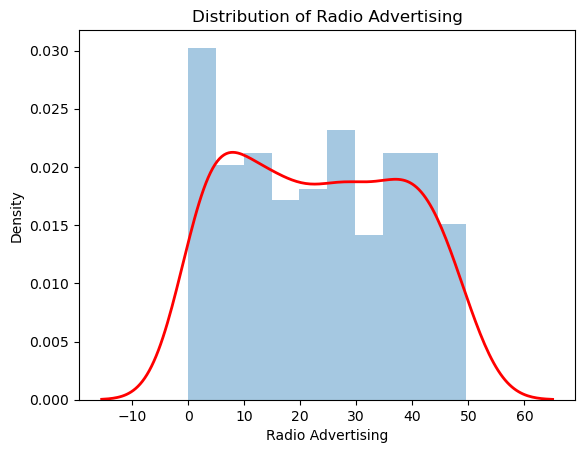

In [12]:
sns.distplot(df['Radio'],
             bins=10,
             kde_kws={'color': 'red', 'linewidth': 2})
plt.xlabel('Radio Advertising')
plt.ylabel('Density')
plt.title('Distribution of Radio Advertising')
plt.show()

Radio adevertising having uniformly distributed data

In [13]:
df['Newspaper'].describe().round(3)

count    200.000
mean      30.554
std       21.779
min        0.300
25%       12.750
50%       25.750
75%       45.100
max      114.000
Name: Newspaper, dtype: float64

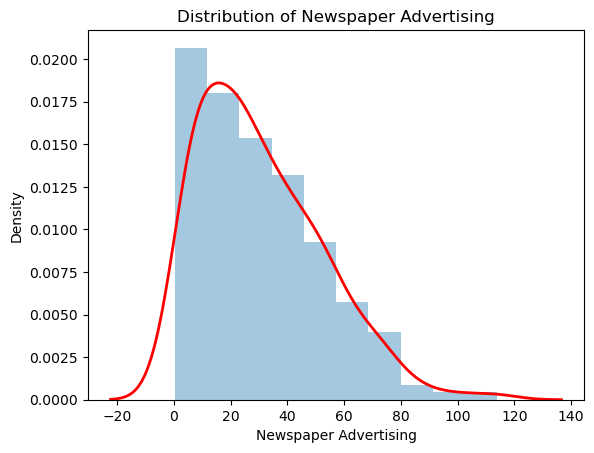

In [14]:
sns.distplot(df['Newspaper'],
                bins=10,
                kde_kws = {'color':'red', 'linewidth':2})
plt.xlabel('Newspaper Advertising')
plt.ylabel('Density')
plt.title('Distribution of Newspaper Advertising')
plt.show()

Newspaper advertising having right skewed distribution

In [46]:
df['Sales'].describe().round(3)

count    200.000
mean      15.131
std        5.284
min        1.600
25%       11.000
50%       16.000
75%       19.050
max       27.000
Name: Sales, dtype: float64

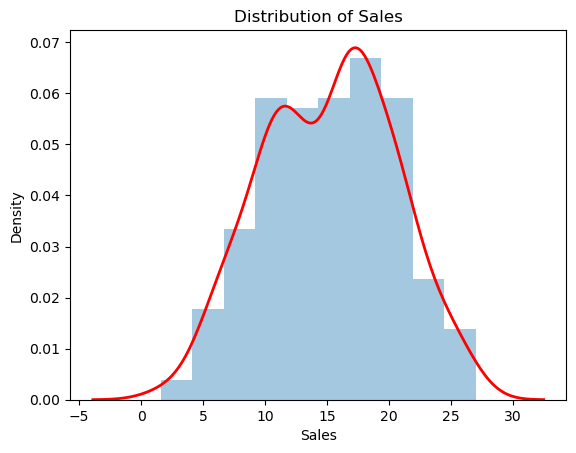

In [44]:
sns.distplot(df['Sales'],
                bins=10,
                kde_kws = {'color':'red', 'linewidth':2})
plt.xlabel('Sales')
plt.ylabel('Density')
plt.title('Distribution of Sales')
plt.show()

Sales having almost normal distribution pattern

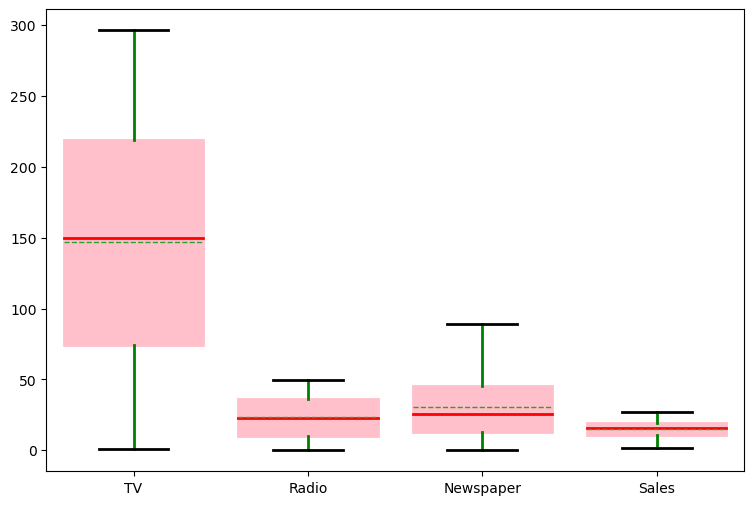

In [15]:
plt.figure(figsize=(9,6))
sns.boxplot(data=df,
            showmeans=True,
            showfliers=False,
            meanline=True,
            medianprops={'linewidth': 2, 'color': 'red'},
            boxprops={'linewidth': 2, 'color': 'pink'},
            capprops={'linewidth': 2, 'color': 'black'}, 
            whiskerprops={'linewidth': 2, 'color': 'green'})
plt.show()

### As we can see there is no outliers present in all the features.

### Bivariate Analysis

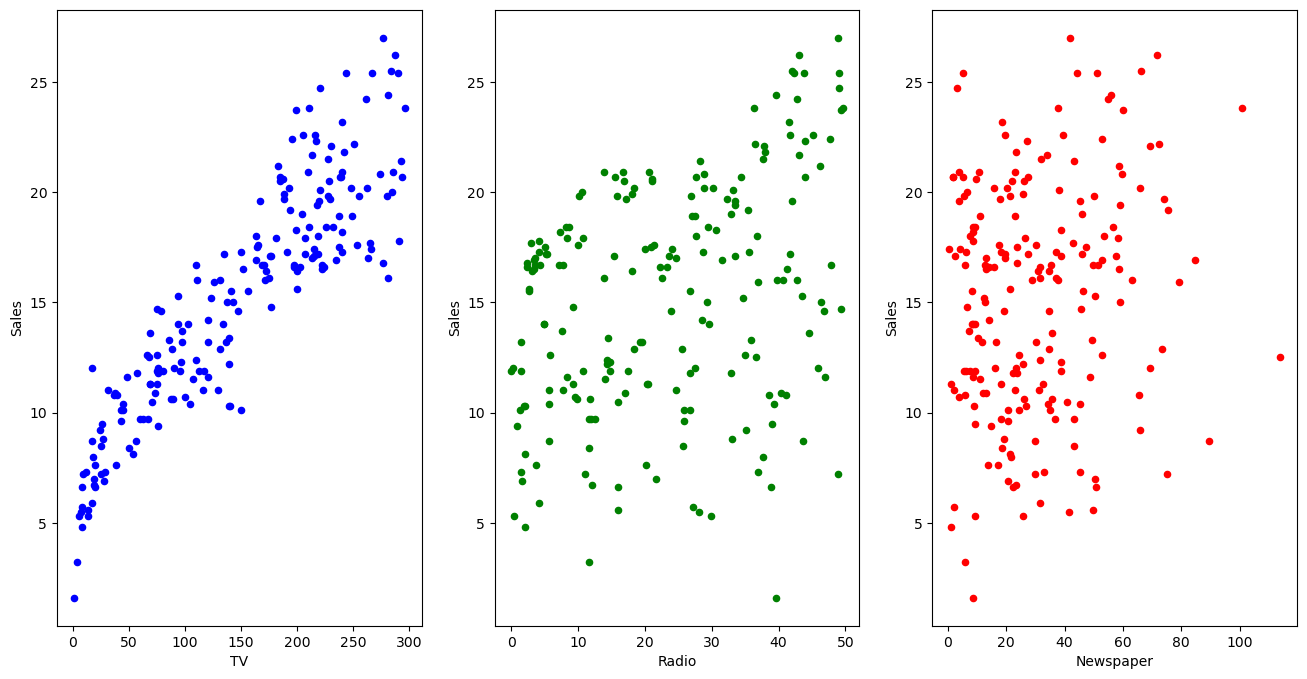

In [16]:
fig, axs = plt.subplots(1, 3)  
df.plot(kind='scatter', x='TV', y='Sales', ax=axs[0],color='blue', figsize=(16,8))
df.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1],color='green')
df.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2],color='red')
plt.show()

### TV advertising has linear relation with Sales and Radio and Newspaper both are uniformly distributed with Sales.

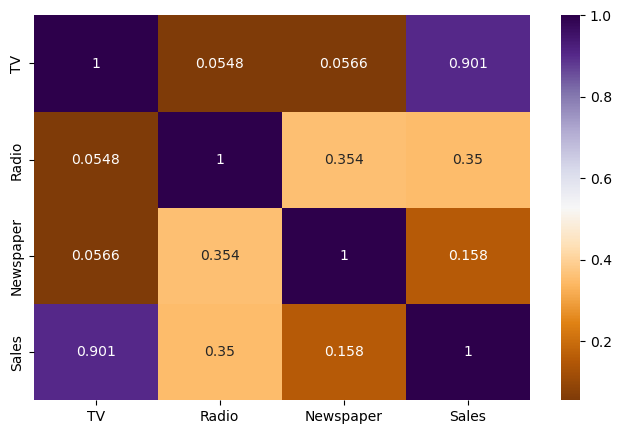

In [17]:
plt.figure(figsize=(8,5))
sns.heatmap(data=df.corr(),annot=True,fmt='.3g',cmap='PuOr')
plt.show()

### As we can see here TV advertising is positively correlated with Sales, followed by Radio and Newspaper advertisings. TV advertising is strong positive(+0.9) towards sales. so we can use only TV feature to predict our sales.

In [18]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### Data preparation

In [19]:
X = df[['TV']]
Y = df['Sales']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160,)
(40,)


## Simple Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(X_train,y_train)

LinearRegression()

In [26]:
lr.coef_

array([0.05548294])

In [27]:
lr.intercept_

7.007108428241851

In [28]:
y_pred = lr.predict(X_test)

In [29]:
from sklearn import metrics

In [30]:
print('MAE :',metrics.mean_absolute_error(y_test,y_pred))
print('MSE :',metrics.mean_squared_error(y_test,y_pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R_Squared :', metrics.r2_score(y_test,y_pred))

MAE : 1.9502948931650088
MSE : 6.101072906773964
RMSE : 2.470035001123256
R_Squared : 0.802561303423698


## Multiple Linear Regression

In [31]:
x = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=100)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 3)
(60, 3)
(140,)
(60,)


In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lr = LinearRegression()

In [37]:
lr.fit(X_train,y_train)

LinearRegression()

In [38]:
lr.coef_

array([0.05382911, 0.11001224, 0.00628995])

In [39]:
lr.intercept_

4.334595861728431

In [40]:
y_prediction = lr.predict(X_test)

In [41]:
from sklearn import metrics

In [42]:
print('MAE :',metrics.mean_absolute_error(y_test,y_prediction))
print('MSE :',metrics.mean_squared_error(y_test,y_prediction))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
print('R_Squared :', metrics.r2_score(y_test,y_prediction))

MAE : 1.227818356658941
MSE : 2.6360765623280655
RMSE : 1.623599877533891
R_Squared : 0.8655979373420272
